<a href="https://colab.research.google.com/github/EmaanBashir/PCR-AND-RFS-PREDICTION-ON-BREAST-CANCER-DATASET/blob/main/FSAnovaThreshold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [ ]:
def data_cleaning_for_regression(df):

    # dropping PCR  for Classification

    df = df.drop('pCR (outcome)',axis=1)

    # Replacing missing values

    df=df.replace(999, np.nan)
    imputer = SimpleImputer(strategy='median')

    df_imputed=imputer.fit_transform(df)

    df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

    # Dealing with Categorical variables

    #  Age,ChemoGrade,Proliferation and TumorStage are ordinal categorical variables so we do not change them

    # ER, PGR, HER2, TrippleNegative, HistologyType and LNStatus are either binary or categorical variables with 2 different
    # values. We just convert HistologyType to binary format.

    df_imputed['HistologyType'] = df_imputed['HistologyType'].map({1: 0, 2: 1})

    return df_imputed

In [ ]:
# Reading the Data and dropping 'ID'
df=pd.read_excel('TrainDataset2023.xls')
df=df.drop('ID',axis=1)

df_regression =  data_cleaning_for_regression(df)
print(df_regression.columns.tolist())

y = df_regression['RelapseFreeSurvival (outcome)']
X = df_regression.drop('RelapseFreeSurvival (outcome)', axis=1)

# Identify categorical and numerical columns
categorical_cols = ['Age', 'ChemoGrade', 'Proliferation', 'TumorStage', 'ER', 'PgR', 'HER2', 'TrippleNegative', 'HistologyType', 'LNStatus']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# Normalize the numerical features
scaler = StandardScaler()
X_normalized = X.copy()
# X_normalized[numerical_cols] = scaler.fit_transform(X[numerical_cols])

['RelapseFreeSurvival (outcome)', 'Age', 'ER', 'PgR', 'HER2', 'TrippleNegative', 'ChemoGrade', 'Proliferation', 'HistologyType', 'LNStatus', 'TumourStage', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', '

In [ ]:
from sklearn.feature_selection import f_regression
import pandas as pd

In [ ]:
# Calculate F-statistic and p-values for regression
f_statistic, p_values = f_regression(X_normalized, y)

# Convert to a pandas series for easier handling
f_statistic_series = pd.Series(f_statistic, index=X_normalized.columns)

# Set a threshold for F-statistic (you can adjust this threshold)
threshold = 3

# Select features whose F-statistic is above the threshold
selected_features = f_statistic_series[f_statistic_series > threshold].index.tolist()

print("Selected features based on F-statistic threshold:")
print(selected_features)
print(len(selected_features))

Selected features based on F-statistic threshold:
['ChemoGrade', 'TumourStage', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_firstorder_90Percentile', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_Variance', 'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_ZoneEntropy', 'original_glszm_ZonePercentage']
22


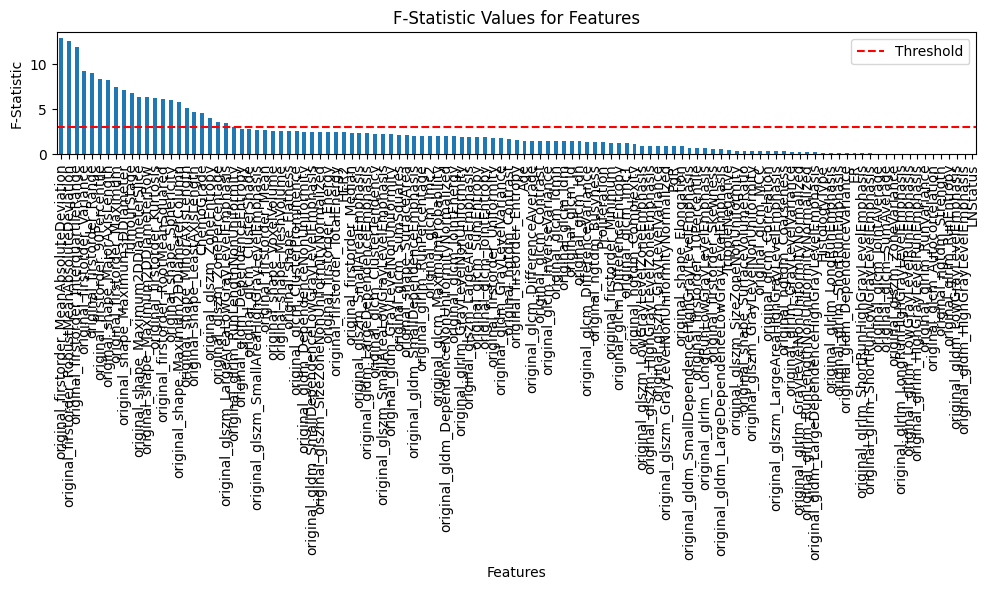

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'f_statistic_series' contains the F-statistic values for each feature

# Sort the F-statistic values in descending order
sorted_features = f_statistic_series.sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sorted_features.plot(kind='bar')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold')
plt.xlabel('Features')
plt.ylabel('F-Statistic')
plt.title('F-Statistic Values for Features')
plt.legend()
plt.tight_layout()
plt.show()
